In [16]:
import numpy as np
import pandas as pd

In [3]:
trans = pd.DataFrame({"A": [12, 4, 5, None, 1],
                      "B": [7, 2, 54, 3, None],
                      "C": [20, 16, 11, 3, 8],
                      "D": [14, 3, None, 2, 6]},
                      index=['Row_1', 'Row_2', 'Row_3', 'Row_4', 'Row_5'])
trans

,A,B,C,D
Row_1,12.0,7.0,20,14.0
Row_2,4.0,2.0,16,3.0
Row_3,5.0,54.0,11,NaN
Row_4,NaN,3.0,3,2.0
Row_5,1.0,NaN,8,6.0


In [4]:
result = trans.transform(lambda x : x + 10)
result

,A,B,C,D
Row_1,22.0,17.0,30,24.0
Row_2,14.0,12.0,26,13.0
Row_3,15.0,64.0,21,NaN
Row_4,NaN,13.0,13,12.0
Row_5,11.0,NaN,18,16.0


In [5]:
result2 = trans.transform([np.sqrt, np.exp])
result2

A                        B                       C  \
           sqrt            exp      sqrt           exp      sqrt   
Row_1  3.464102  162754.791419  2.645751  1.096633e+03  4.472136   
Row_2  2.000000      54.598150  1.414214  7.389056e+00  4.000000   
Row_3  2.236068     148.413159  7.348469  2.830753e+23  3.316625   
Row_4       NaN            NaN  1.732051  2.008554e+01  1.732051   
Row_5  1.000000       2.718282       NaN           NaN  2.828427   

                            D                
                exp      sqrt           exp  
Row_1  4.851652e+08  3.741657  1.202604e+06  
Row_2  8.886111e+06  1.732051  2.008554e+01  
Row_3  5.987414e+04       NaN           NaN  
Row_4  2.008554e+01  1.414214  7.389056e+00  
Row_5  2.980958e+03  2.449490  4.034288e+02

In [6]:
x = np.random.randint(10, 200, size=10)
x

array([ 72, 118, 167, 163, 140,  21,  62,  30, 177,  29])

In [7]:
np.digitize(x,bins=[50])

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [8]:
np.digitize(x,bins=[50, 100])

array([1, 2, 2, 2, 2, 0, 1, 0, 2, 0], dtype=int64)

In [9]:
df = pd.DataFrame({"height": x})
df

,height
0,72
1,118
2,167
3,163
4,140
5,21
6,62
7,30
8,177
9,29


In [10]:
df['binned'] = pd.cut(x=df['height'], bins=[0, 25, 50, 100, 200])
df

,height,binned
0,72,"(50, 100]"
1,118,"(100, 200]"
2,167,"(100, 200]"
3,163,"(100, 200]"
4,140,"(100, 200]"
5,21,"(0, 25]"
6,62,"(50, 100]"
7,30,"(25, 50]"
8,177,"(100, 200]"
9,29,"(25, 50]"


In [11]:
df['bin_label'] = pd.cut(x = df['height'],
                         bins = [0, 25, 50, 100, 200],
                         labels = [1, 2, 3, 4])
df

,height,binned,bin_label
0,72,"(50, 100]",3
1,118,"(100, 200]",4
2,167,"(100, 200]",4
3,163,"(100, 200]",4
4,140,"(100, 200]",4
5,21,"(0, 25]",1
6,62,"(50, 100]",3
7,30,"(25, 50]",2
8,177,"(100, 200]",4
9,29,"(25, 50]",2


In [12]:
pd.qcut(df['height'], q=5)

0     (68.0, 126.8]
1     (68.0, 126.8]
2    (163.8, 177.0]
3    (126.8, 163.8]
4    (126.8, 163.8]
5    (20.999, 29.8]
6      (29.8, 68.0]
7      (29.8, 68.0]
8    (163.8, 177.0]
9    (20.999, 29.8]
Name: height, dtype: category
Categories (5, interval[float64]): [(20.999, 29.8] < (29.8, 68.0] < (68.0, 126.8] < (126.8, 163.8] < (163.8, 177.0]]

In [13]:
degrees = ["none", "cum laude", "magna cum laude", "summa cum laude"]
student_results = [3.93, 3.24, 2.80, 2.83, 3.91, 3.698, 3.731, 3.25, 3.24, 3.82, 3.22]
student_results.sort(reverse=True)

student_results_degrees = pd.cut(student_results, [0, 3.6, 3.8, 3.9, 4.0], labels=degrees)
honor = pd.DataFrame({'grades': student_results,
                      'honors': student_results_degrees})
honor

,grades,honors
0,3.930,summa cum laude
1,3.910,summa cum laude
2,3.820,magna cum laude
3,3.731,cum laude
4,3.698,cum laude
5,3.250,none
6,3.240,none
7,3.240,none
8,3.220,none
9,2.830,none


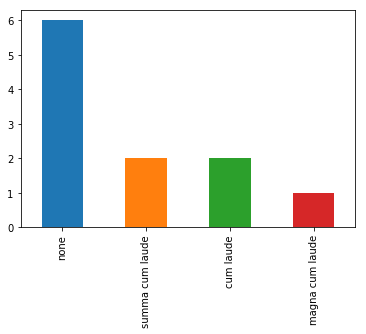

In [18]:
pd.value_counts(student_results_degrees).plot.bar()

In [17]:
pd.value_counts(student_results_degrees)

none               6
summa cum laude    2
cum laude          2
magna cum laude    1
dtype: int64